In [51]:
##############################################################################################
# The Purpose of the exercise is to determine the best regression model for a set of data.   #
# Model in questions are: Linear, Polynomial, Support Vector and Random Forest Regressions.  #
# Each model is applied to both training and testing dataset.                                #
# In addition, sklearn scaler, OneHotEncoder, labelEnconder are applied.                     #
#                                                                                            #
# Prepared by: Plinio Monteiro                                                               #
##############################################################################################


In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [17]:
data = pd.read_csv ('C:/Ops/Python/PredictiveModel/insurance.csv')
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


#### Observations: sex, smoker and region are categorical variables. One hot encounding will be needed. 

In [18]:
count_nan = data.isnull().sum() # Check number of missing values for every column
print(count_nan)

age         0
sex         0
bmi         5
children    0
smoker      0
region      0
charges     0
dtype: int64


#### Observations: bmi has 5 missing values. Let's replace it with the bmi mean value.

In [19]:
# Since bmi has 5 null values, let's replace these 5 values with the overall bmi mean

data['bmi'].fillna(data['bmi'].mean(), inplace=True) # fill the missing value with the mean
print(data.head())
print('')
count_nan = data.isnull().sum()    # Check if still there is any missing value
print(count_nan)

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


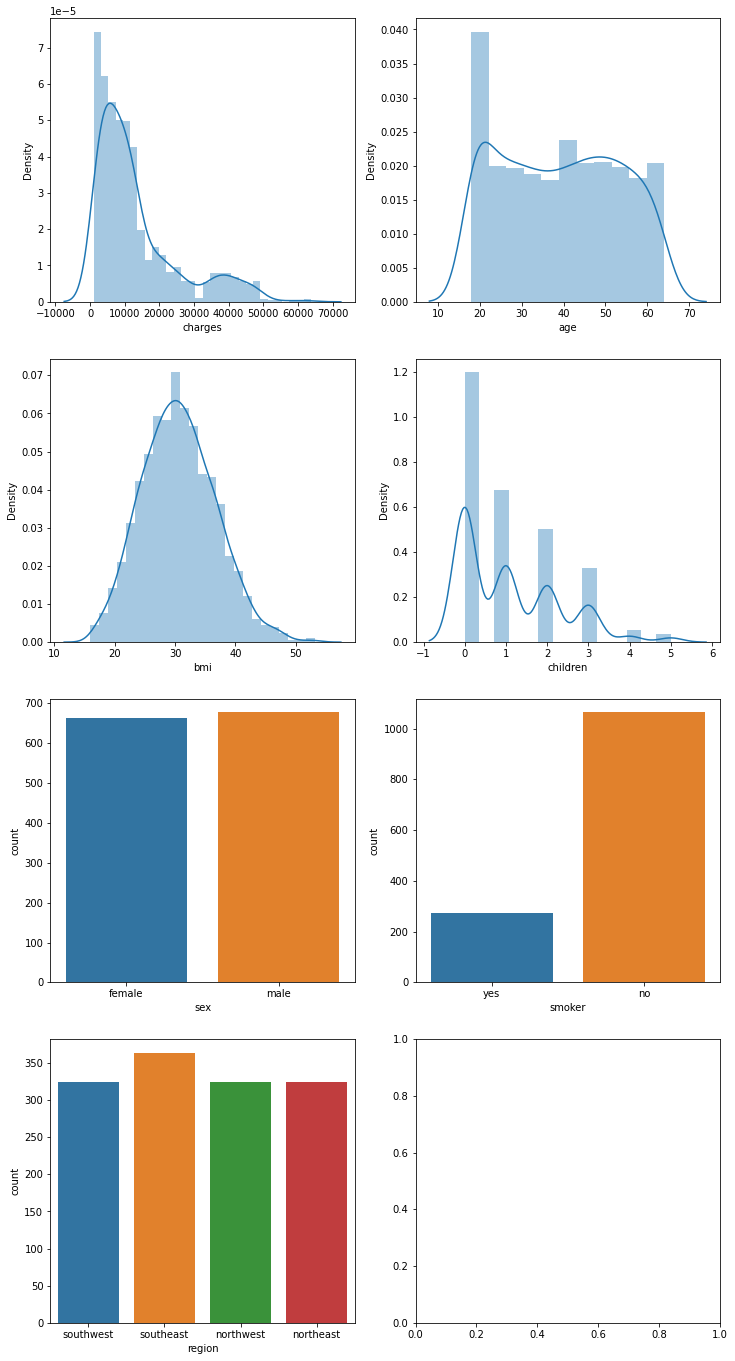

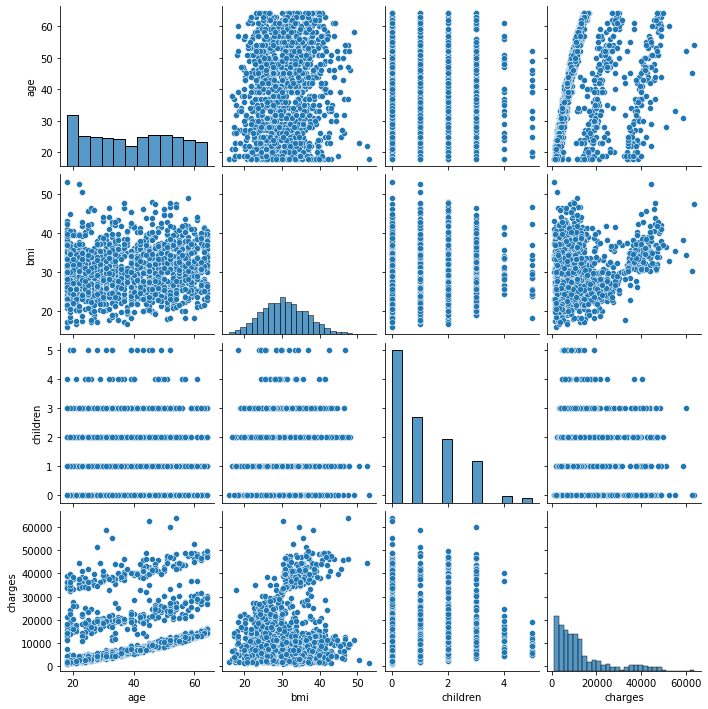

In [20]:
# Let's use seaborn distplot and pairplot to identify data shape and correlations.

figure, ax = plt.subplots(4,2, figsize=(12,24))

#See the distrubution of the data
sns.distplot(data['charges'],ax= ax[0,0])
sns.distplot(data['age'],ax=ax[0,1])
sns.distplot(data['bmi'],ax= ax[1,0])
sns.distplot(data['children'],ax= ax[1,1])


sns.countplot(data['sex'],ax=ax[2,0])
sns.countplot(data['smoker'],ax= ax[2,1])
sns.countplot(data['region'],ax= ax[3,0])



#visualizeing skewness
sns.pairplot(data)


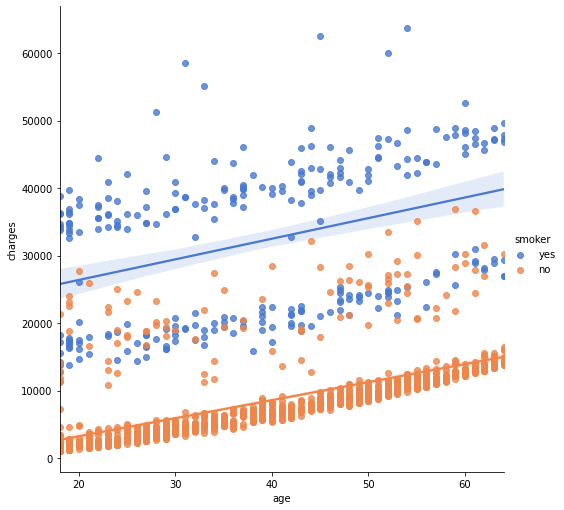

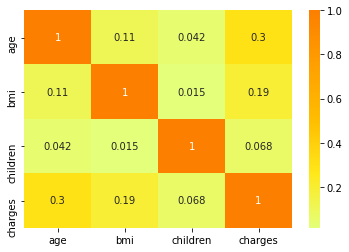

In [21]:
#Lets look at smokers vs non-smokers on age vs charges:

sns.lmplot(x="age", y="charges", hue="smoker", data=data, palette = 'muted', height = 7)
plt.show(sns)

#Lets look at correlation:

corr = data.corr()

sns.heatmap(corr, cmap = 'Wistia', annot= True)
plt.show(sns)

#### Observations:
1. We can note that age has a linear relationship with insurance premium charges. The older one is, the higher one is charged.
2. Note also that smokers pay a higher premium than no smokers irrespective of the age group.

In [22]:
# Let's import sklnearn One Hot Encoder and Label Encoder
# These are primarily used to convert categorical values into numerical values.
#
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [17]:
########## Let's Convert Categorical Data into Numbers ################
# Note that there are two good options for converting  ################
# 1) Using Pandas dummies function                     ################
# 2) Using Sklearn One Hot Encoder                     ################
#                                                      ################

In [23]:
# Pandas factorizing: maps each category to a different integer = label encoder 

#create series for pandas

region = data["region"] # series 
region_encoded, region_categories = pd.factorize(region)
factor_region_mapping = dict(zip(region_categories, region_encoded)) #mapping of encoded numbers and original categories. 

print("Pandas factorize function for label encoding with series")  
print(region[:10]) #original version 
print(region_categories) #list of categories
print(region_encoded[:10]) #encoded numbers for categories 
print(factor_region_mapping) # print factor mapping

Pandas factorize function for label encoding with series
0    southwest
1    southeast
2    southeast
3    northwest
4    northwest
5    southeast
6    southeast
7    northwest
8    northeast
9    northwest
Name: region, dtype: object
Index(['southwest', 'southeast', 'northwest', 'northeast'], dtype='object')
[0 1 1 2 2 1 1 2 3 2]
{'southwest': 0, 'southeast': 1, 'northwest': 1, 'northeast': 2}


In [19]:
# option1: pandas get_dummies: maps each category to 0 (cold) or 1 (hot) = one hot encoder 

#create series for pandas
region = data["region"] # series 
region_encoded = pd.get_dummies(region, prefix='')

print("Pandas get_dummies function for one hot encoding with series")  

print(region[:10]) #original version 
print(region_encoded[:10]) #encoded numbers for categories 

Pandas get_dummies function for one hot encoding with series
0    southwest
1    southeast
2    southeast
3    northwest
4    northwest
5    southeast
6    southeast
7    northwest
8    northeast
9    northwest
Name: region, dtype: object
   _northeast  _northwest  _southeast  _southwest
0           0           0           0           1
1           0           0           1           0
2           0           0           1           0
3           0           1           0           0
4           0           1           0           0
5           0           0           1           0
6           0           0           1           0
7           0           1           0           0
8           1           0           0           0
9           0           1           0           0


#### Observations: One hot encoding converted the 4 region variations into 4 distinct variables with 1 denoting the presence.

In [24]:
# Let's use Sklearn label encoding to map sex and smoker. 

#create ndarray for label encodoing (sklearn)
sex = data.iloc[:,1:2].values
smoker = data.iloc[:,4:5].values

In [25]:
#label encoder = le
## le for sex
le = LabelEncoder()
# sex[:,0] = le.fit_transform(sex[:,0])
sex = le.fit_transform(sex[:,0])
sex = pd.DataFrame(sex)
sex.columns = ['sex']
le_sex_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Sklearn label encoder results for sex:")
print(le_sex_mapping)
print(sex[:10])

Sklearn label encoder results for sex:
{'female': 0, 'male': 1}
   sex
0    0
1    1
2    1
3    1
4    1
5    0
6    0
7    0
8    1
9    0


In [26]:
## le for smoker
le = LabelEncoder()
smoker[:,0] = le.fit_transform(smoker[:,0])
smoker = pd.DataFrame(smoker)
smoker.columns = ['smoker']
le_smoker_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Sklearn label encoder results for smoker:")
print(le_smoker_mapping)
print(smoker[:10])

Sklearn label encoder results for smoker:
{'no': 0, 'yes': 1}
  smoker
0      1
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0


In [30]:
#option3: sklearn one hot encoding: maps each category to 0 (cold) or 1 (hot) 

#one hot encoder = ohe

#create ndarray for one hot encodoing (sklearn)
region = data.iloc[:,5:6].values #ndarray
print("Region Original State : ", region)

## ohe for region
ohe = OneHotEncoder() 

region = ohe.fit_transform(region).toarray()
print("Region Encoded = ", region)

# Let's place Region encoded array into a dataframe
region = pd.DataFrame(region)
region.columns = ['northeast', 'northwest', 'southeast', 'southwest']
print("Sklearn one hot encoder results for region:")  
print(region[:10])

Region Original State :  [['southwest']
 ['southeast']
 ['southeast']
 ...
 ['southeast']
 ['southwest']
 ['northwest']]
Region Encoded =  [[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]
Sklearn one hot encoder results for region:
   northeast  northwest  southeast  southwest
0        0.0        0.0        0.0        1.0
1        0.0        0.0        1.0        0.0
2        0.0        0.0        1.0        0.0
3        0.0        1.0        0.0        0.0
4        0.0        1.0        0.0        0.0
5        0.0        0.0        1.0        0.0
6        0.0        0.0        1.0        0.0
7        0.0        1.0        0.0        0.0
8        1.0        0.0        0.0        0.0
9        0.0        1.0        0.0        0.0


In [31]:
######################## Dividing the Data into Test tand Train #################################

#putting the data together:

##take the numerical data from the original data
X_num = data[['age', 'bmi', 'children']].copy()

##take the encoded data and add to numerical data
X_final = pd.concat([X_num, region, sex, smoker], axis = 1)

#define y as being the "charges column" from the original dataset
y_final = data[['charges']].copy()

#Test train split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.33, random_state = 0 )
#X_train, X_test, y_train, y_test = train_test_split(data[['age']], y_final, test_size = 0.33, random_state = 0 )

In [32]:
X_final.describe()

,age,bmi,children,northeast,northwest,southeast,southwest,sex
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.658545,1.094918,0.242152,0.242900,0.272048,0.242900,0.505232
std,14.049960,6.081382,1.205493,0.428546,0.428995,0.445181,0.428995,0.500160
min,18.000000,15.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.315000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,51.000000,34.600000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,64.000000,53.130000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
X_train.head(10)

,age,bmi,children,northeast,northwest,southeast,southwest,sex,smoker
1271,25,34.485,0,0.0,1.0,0.0,0.0,0,0
1313,19,34.700,2,0.0,0.0,0.0,1.0,0,1
2,28,33.000,3,0.0,0.0,1.0,0.0,1,0
405,52,38.380,2,1.0,0.0,0.0,0.0,0,0
482,18,31.350,0,0.0,0.0,1.0,0.0,0,0
338,50,32.300,1,1.0,0.0,0.0,0.0,1,1
356,46,43.890,3,0.0,0.0,1.0,0.0,1,0
869,25,24.300,3,0.0,0.0,0.0,1.0,0,0
182,22,19.950,3,1.0,0.0,0.0,0.0,1,0
704,47,29.545,1,0.0,1.0,0.0,0.0,0,0


In [35]:
# Let's check split of the data.
print("{0:0.2f}% data is in training set".format((len(X_train)/len(X_final.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(X_final.index)) * 100))

66.97% data is in training set
33.03% data is in test set


In [36]:
# Library to rescale the data set in order to normalize the dataset

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [38]:
################################## FeatureScaling using MinMax #############################

###normalized scaler (fit transform on train, fit only on test)
# Rescales the data set such that all feature values are in the range [0, 1] 

n_scaler = MinMaxScaler()
X_train = n_scaler.fit_transform(X_train.astype(np.float))
X_test= n_scaler.transform(X_test.astype(np.float))


In [39]:
#standard scaler (fit transform on train, fit only on test)
# removes the mean and scales the data to unit variance. However, the outliers have an influence 
#         when computing the empirical mean and standard deviation
# StandardScaler therefore cannot guarantee balanced feature scales in the presence of outliers.
 
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test= s_scaler.transform(X_test.astype(np.float))

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
################### Let's run a Linear Regression ##############################################
lr = LinearRegression().fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

#print score
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))
print('lr train score %.3f, lr test score: %.3f' % (
lr.score(X_train,y_train),
lr.score(X_test, y_test)))

lr.coef_: [[ 3.62239021e+03  1.96631250e+03  7.01866689e+02  9.16271852e+16
   9.29845714e+16  9.66472028e+16  9.49577890e+16 -4.80286206e+01
   9.30518502e+03]]
lr.intercept_: [13144.91031682]
lr train score 0.728, lr test score: 0.785


In [42]:
from sklearn.preprocessing import PolynomialFeatures

In [43]:
####################   Let's run a Polynomial Regression ###################################

poly = PolynomialFeatures (degree = 2)
X_poly = poly.fit_transform(X_final)

X_train,X_test,y_train,y_test = train_test_split(X_poly,y_final, test_size = 0.33, random_state = 0)

#standard scaler (fit transform on train, fit only on test)
sc = StandardScaler()
X_train = sc.fit_transform(X_train.astype(np.float))
X_test= sc.transform(X_test.astype(np.float))

#fit model
poly_lr = LinearRegression().fit(X_train,y_train)

y_train_pred = poly_lr.predict(X_train)
y_test_pred = poly_lr.predict(X_test)

#print score
print('poly train score %.3f, poly test score: %.3f' % (
poly_lr.score(X_train,y_train),
poly_lr.score(X_test, y_test)))

poly train score 0.828, poly test score: 0.870


In [44]:
from sklearn.svm import SVR

In [45]:
###########################  Support Vector Regression  ######################################

svr = SVR(kernel='linear', C = 300)

#test train split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.33, random_state = 0 )

#standard scaler (fit transform on train, fit only on test)
sc = StandardScaler()
X_train = sc.fit_transform(X_train.astype(np.float))
X_test= sc.transform(X_test.astype(np.float))

#fit model
svr = svr.fit(X_train,y_train.values.ravel())
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

#print score
print('svr train score %.3f, svr test score: %.3f' % (
svr.score(X_train,y_train),
svr.score(X_test, y_test)))

svr train score 0.598, svr test score: 0.628


In [46]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [47]:
###################### Random Forest Regression #######################################
forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
#test train split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.33, random_state = 0 )

#standard scaler (fit transform on train, fit only on test)
sc = StandardScaler()
X_train = sc.fit_transform(X_train.astype(np.float))
X_test= sc.transform(X_test.astype(np.float))

#fit model
forest.fit(X_train,y_train.values.ravel())
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

#print score
print('forest train score %.3f, forest test score: %.3f' % (
forest.score(X_train,y_train),
forest.score(X_test, y_test)))

forest train score 0.973, forest test score: 0.859


<h2>In Summary:</h2><br>
Linear Regression         = lr train score 0.728, lr test score: 0.786 <br>
Polynomial Regression     = poly train score 0.828, poly test score: 0.870 <br>
Support Vector Regression = svr train score 0.598, svr test score: 0.628 <br>
Random Forest regression  = forest train score 0.973, forest test score: 0.859 <br>